## Data preperation and cleaning

In [3]:
import os
import cv2 
import itertools
import numpy as np 
import pandas as pd 

test_dir = "../Alzheimers disease predictor/test/"
train_dir = "../Alzheimers disease predictor/train/"

data = []
     

In [4]:
for dirtrain in os.listdir(train_dir): 
    print(dirtrain)
    for tr in os.listdir(train_dir + dirtrain):
        img = cv2.imread(train_dir + dirtrain + "/" + tr)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        
        data.append([img, dirtrain]) 

MildDemented
ModerateDemented
NonDemented
VeryMildDemented


In [5]:
for dirtest in  os.listdir(test_dir):    
    print(dirtest)
    for ts in os.listdir(test_dir + dirtest):
        img = cv2.imread(test_dir + dirtest + "/" + ts)
        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.reshape(32, 32, 1)
        
        data.append([img, dirtest])

MildDemented
ModerateDemented
NonDemented
VeryMildDemented


#### In each iteration we:
</br>
-read image </br>
-resize the image to matrix of 32x32</br>
-grayscaling image</br>
-reshape the image to 3D with one color channel (Gray)</br>
-append each image with label to the data list</br>

In [6]:
import random
random.seed(20)

In [7]:
random.shuffle(data)

In [8]:
x, y = [], []
for e in data:
    x.append(e[0])
    y.append(e[1])

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
x = np.array(x)
y = np.array(y)
y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore').fit(y)
print(enc.categories_)
y = enc.transform(y).toarray()
print(f'Data   :   {str(x.shape)}')
print(f'Labels :   {str(y.shape)}')

[array(['MildDemented', 'ModerateDemented', 'NonDemented',
       'VeryMildDemented'], dtype='<U16')]
Data   :   (6400, 32, 32, 1)
Labels :   (6400, 4)


In [11]:
from sklearn.model_selection import train_test_split
#We then split the data into training and validation sets. We use 80% of the data for training and 20% for validation.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

In [13]:
import tensorflow as tf

## Building the model

In [14]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (4, 4), padding='same', activation=tf.nn.relu, 
    input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)), Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),

    tf.keras.layers.Conv2D(128, (2,2), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),

    tf.keras.layers.Conv2D(256, (2,2), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    Dropout(0.3),
                    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

In [16]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)         0

In [18]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#plotting the model so we can see layers and number of parameters in every layer

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## training the model 

In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=64,verbose=1,shuffle=True)

Epoch 1/100
64/64 [==============================] - 13s 184ms/step - loss: 2.1822 - accuracy: 0.4539 - val_loss: 1.1453 - val_accuracy: 0.5137
Epoch 2/100
64/64 [==============================] - 12s 180ms/step - loss: 1.0504 - accuracy: 0.4858 - val_loss: 1.1419 - val_accuracy: 0.5303
Epoch 3/100
64/64 [==============================] - 12s 183ms/step - loss: 1.0212 - accuracy: 0.4902 - val_loss: 1.0063 - val_accuracy: 0.5625
Epoch 4/100
64/64 [==============================] - 12s 187ms/step - loss: 0.9885 - accuracy: 0.5122 - val_loss: 1.0754 - val_accuracy: 0.5615
Epoch 5/100
64/64 [==============================] - 11s 177ms/step - loss: 0.9737 - accuracy: 0.5164 - val_loss: 0.9621 - val_accuracy: 0.5879
Epoch 6/100
64/64 [==============================] - 11s 178ms/step - loss: 0.9540 - accuracy: 0.5261 - val_loss: 1.0077 - val_accuracy: 0.5479
Epoch 7/100
64/64 [==============================] - 12s 182ms/step - loss: 0.9622 - accuracy: 0.5200 - val_loss: 0.8949 - val_accuracy:

64/64 [==============================] - 12s 183ms/step - loss: 0.4385 - accuracy: 0.8225 - val_loss: 0.3794 - val_accuracy: 0.8438
Epoch 58/100
64/64 [==============================] - 12s 187ms/step - loss: 0.4094 - accuracy: 0.8279 - val_loss: 0.4056 - val_accuracy: 0.8330
Epoch 59/100
64/64 [==============================] - 12s 183ms/step - loss: 0.4250 - accuracy: 0.8269 - val_loss: 0.3773 - val_accuracy: 0.8418
Epoch 60/100
64/64 [==============================] - 12s 183ms/step - loss: 0.3908 - accuracy: 0.8438 - val_loss: 0.4031 - val_accuracy: 0.8398
Epoch 61/100
64/64 [==============================] - 12s 186ms/step - loss: 0.3920 - accuracy: 0.8430 - val_loss: 0.3312 - val_accuracy: 0.8662
Epoch 62/100
64/64 [==============================] - 12s 183ms/step - loss: 0.3807 - accuracy: 0.8450 - val_loss: 0.3361 - val_accuracy: 0.8623
Epoch 63/100
64/64 [==============================] - 12s 185ms/step - loss: 0.3620 - accuracy: 0.8594 - val_loss: 0.3542 - val_accuracy: 0.867

## plotting the training and validation accuracy

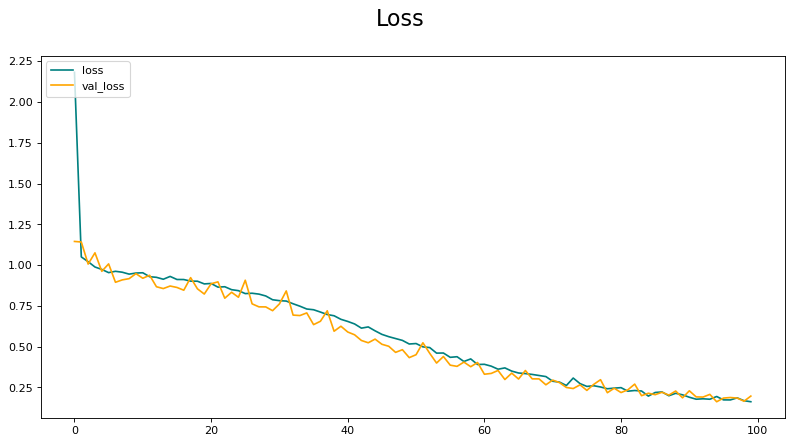

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

We plot the loss of training. We can see that the loss is decreasing with each epoch. We can also see that the validation loss is decreasing with each epoch. This means that the model is not overfitting the training data.

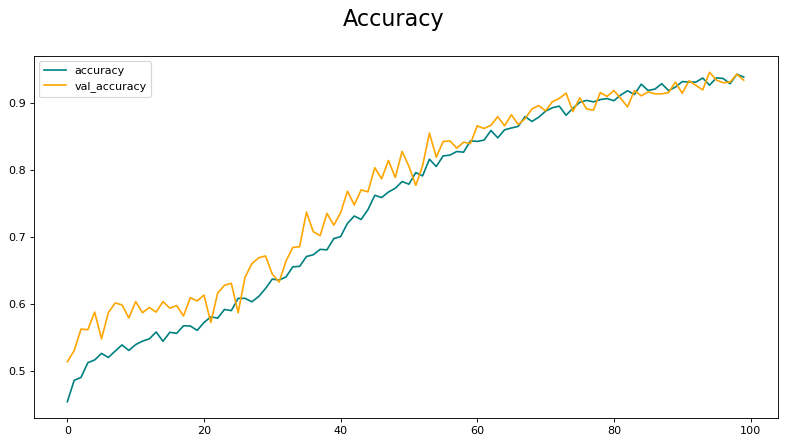

In [21]:
fig = plt.figure(figsize=(12, 6), dpi=80)
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

We can see that the accuracy is increasing with each epoch.

## Evaluating the model

In [23]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)
y_pred = model.predict(x_test).argmax(axis=1)
print(f'Test Loss     : {loss_and_metrics[0]}')
print(f'Test Accuracy : {loss_and_metrics[1]}')
     

40/40 - 1s - loss: 0.1956 - accuracy: 0.9328 - 804ms/epoch - 20ms/step
40/40 [==============================] - 1s 19ms/step
Test Loss     : 0.1956094652414322
Test Accuracy : 0.932812511920929


We predict the labels of the validation set. We then calculate the accuracy of the model by comparing the predicted labels with the actual labels and print the accuracy and loss of the model.

In [24]:
from sklearn import metrics

df = pd.DataFrame(
  data = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred),
  columns = ['0', '1', '2', '3'],
  index = ['0', '1', '2', '3']
)
df

,0,1,2,3
0,164,0,6,8
1,0,13,0,0
2,5,0,626,26
3,5,2,34,391


<AxesSubplot:>

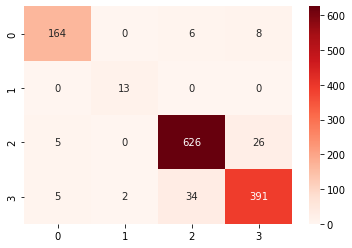

In [25]:
import seaborn as sns

sns.heatmap(df, cmap="Reds", annot=True, fmt='.0f')

The confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. We can see from the confusion matrix that the model is performing well.